<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: <br>
   **Student ID**: <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [3]:
#we want to study the influence of distance to the nearest MRT station on house's price
data_frame = pd.read_csv('Real_estate.csv', index_col=0)
N = len(data_frame)
data_frame.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
#choose only distance, age and convenience stores and price column of this dataframe
df = data_frame[["X3 distance to the nearest MRT station","X2 house age","X4 number of convenience stores", "Y house price of unit area"]] \
  .rename(columns ={"X3 distance to the nearest MRT station":"distance", "Y house price of unit area":"price" \
      ,"X2 house age":"age", "X4 number of convenience stores":"n_stores"
      })
df.head()

,distance,age,n_stores,price
No,,,,
1,84.87882,32.0,10,37.9
2,306.59470,19.5,9,42.2
3,561.98450,13.3,5,47.3
4,561.98450,13.3,5,54.8
5,390.56840,5.0,5,43.1


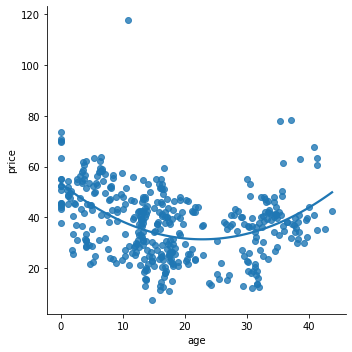

In [12]:
sns.lmplot(x ="age", y ="price", data = df, order = 2, ci = None)

In [13]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1:].to_numpy()

In [15]:
#divide date to test and train (20% for test) 
fraction = 0.8
train_size = int(fraction*N)
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

In [40]:
#fit linear regression
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_predict_reg = regr.predict(X_test)

# The mean squared error
print("Mean squared Error on test set : ", mean_squared_error(Y_test, Y_predict_reg))


Mean squared Error on test set :  62.139360768299376


In [42]:
#use linear regression in normalized data

regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, Y_train)
Y_predict_reg = regr.predict(X_test)

# The mean squared error
print("Mean squared Error on test set : ", mean_squared_error(Y_test, Y_predict_reg))


Mean squared Error on test set :  62.139360768299376


C:\Users\B.OVEIS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


we find that there's no difference in error in normalizing data. 

In [54]:
#use Ridge loss and ridge model 
from sklearn.linear_model import Ridge

ridge_regr = Ridge(alpha = 0.1)
ridge_regr.fit(X_train, Y_train)
Y_predict_ridge = ridge_regr.predict(X_test)
 
# calculate mean square error
print("Mean squared Error on test set (alpha = 0.1): ", mean_squared_error(Y_test, Y_predict_ridge)) 

ridge_regr = Ridge(alpha = 1)
ridge_regr.fit(X_train, Y_train)
Y_predict_ridge = ridge_regr.predict(X_test)
 
# calculate mean square error
print("Mean squared Error on test set (alpha = 1): ", mean_squared_error(Y_test, Y_predict_ridge)) 

ridge_regr = Ridge(alpha = 10)
ridge_regr.fit(X_train, Y_train)
Y_predict_ridge = ridge_regr.predict(X_test)
 
# calculate mean square error
print("Mean squared Error on test set (alpha = 10): ", mean_squared_error(Y_test, Y_predict_ridge)) 

ridge_regr = Ridge(alpha = 0.01)
ridge_regr.fit(X_train, Y_train)
Y_predict_ridge = ridge_regr.predict(X_test)
 
# calculate mean square error
print("Mean squared Error on test set (alpha = 0.01): ", mean_squared_error(Y_test, Y_predict_ridge)) 


Mean squared Error on test set (alpha = 0.1):  62.13914386044549
Mean squared Error on test set (alpha = 1):  62.13719586412624
Mean squared Error on test set (alpha = 10):  62.11812507708798
Mean squared Error on test set (alpha = 0.01):  62.13933907333552


we see that bigger alpha make MSE smaller and model work a little better than linear-reg

In [52]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso_regr = Lasso(alpha = 1)
lasso_regr.fit(X_train, Y_train)
Y_predict_lasso = lasso_regr.predict(X_test)

print("Mean squared error on test set(alpha = 1)", mean_squared_error(Y_test,Y_predict_lasso))


lasso_regr = Lasso(alpha = 10)
lasso_regr.fit(X_train, Y_train)
Y_predict_lasso = lasso_regr.predict(X_test)

print("Mean squared error on test set(alpha = 10)", mean_squared_error(Y_test,Y_predict_lasso))


lasso_regr = Lasso(alpha = 0.1)
lasso_regr.fit(X_train, Y_train)
Y_predict_lasso = lasso_regr.predict(X_test)

print("Mean squared error on test set(alpha = 0.1)", mean_squared_error(Y_test,Y_predict_lasso))


lasso_regr = Lasso(alpha = 0.01)
lasso_regr.fit(X_train, Y_train)
Y_predict_lasso = lasso_regr.predict(X_test)

print("Mean squared error on test set(alpha = 0.01)", mean_squared_error(Y_test,Y_predict_lasso))

Mean squared error on test set(alpha = 1) 61.656408003929386
Mean squared error on test set(alpha = 10) 67.40063031491438
Mean squared error on test set(alpha = 0.1) 62.07225845929922
Mean squared error on test set(alpha = 0.01) 62.1324590985867


best alpha for lasso_reg is 1 and as we make alpha smaller, it make lasso model close to linear

In [56]:
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, Y_train)
Y_predict_elastic = e_net.predict(X_test)

print("Mean Squared Error on test set(alpha = 1)", mean_squared_error(Y_test, Y_predict_elastic))

e_net = ElasticNet(alpha = 0.1)
e_net.fit(X_train, Y_train)
Y_predict_elastic = e_net.predict(X_test)

print("Mean Squared Error on test set(alpha = 0.1)", mean_squared_error(Y_test, Y_predict_elastic))


e_net = ElasticNet(alpha = 0.01)
e_net.fit(X_train, Y_train)
Y_predict_elastic = e_net.predict(X_test)

print("Mean Squared Error on test set(alpha = 0.01)", mean_squared_error(Y_test, Y_predict_elastic))


e_net = ElasticNet(alpha = 10)
e_net.fit(X_train, Y_train)
Y_predict_elastic = e_net.predict(X_test)

print("Mean Squared Error on test set(alpha = 10)", mean_squared_error(Y_test, Y_predict_elastic))


Mean Squared Error on test set(alpha = 1) 61.72486378689951
Mean Squared Error on test set(alpha = 0.1) 62.07219096957181
Mean Squared Error on test set(alpha = 0.01) 62.132344726434404
Mean Squared Error on test set(alpha = 10) 65.5676111960834


this model with alpha=1 work better than linear regression and have smaller MSE